In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
injury_data_path = Path("../Data/CombinedBPI.csv")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['No Injury', 'Injury'], 
            yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
 = pd.read_csv(injury_data_path)

# Select relevant columns for correlation analysis
relevant_columns = ['player_age', 'hit', 'single', 'double', 'triple', 'home_run', 'strikeout', 'walk', 'k_percent', 'bb_percent', 'batting_avg']

# Filter the dataset to include only the relevant columns and drop rows with missing values
correlation_data = injury_data_df[relevant_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Set title for the heatmap
plt.title('Correlation between Age and Performance Metrics', fontsize=16)

# Show the plot
plt.show()


# Select relevant columns for correlation analysis
relevant_columns = ['player_age', 'hit', 'single', 'double', 'triple', 'home_run', 'strikeout', 'walk', 'k_percent', 'bb_percent', 'batting_avg']

# Filter the dataset to include only the relevant columns and drop rows with missing values
correlation_data = data[relevant_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Set title for the heatmap
plt.title('Correlation between Age and Performance Metrics', fontsize=16)

# Show the plot
plt.show()


IndentationError: unexpected indent (<ipython-input-1-deb1937717b8>, line 25)

<ipython-input-2-c244f80f934d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  injury_data_df['Injury / Surgery Date'] = pd.to_datetime(injury_data_df['Injury / Surgery Date'], errors='coerce')
<ipython-input-2-c244f80f934d>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  injury_data_df['Return Date'] = pd.to_datetime(injury_data_df['Return Date'], errors='coerce')


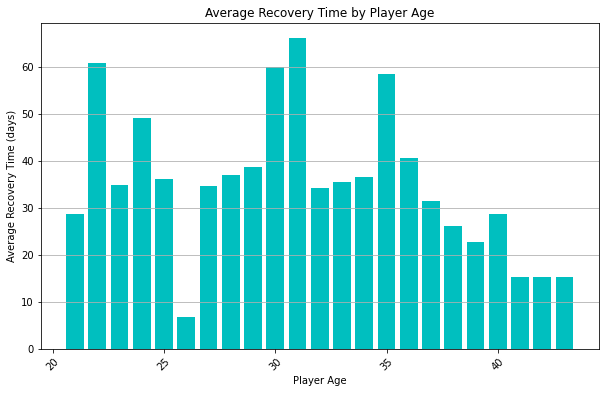

In [2]:
# Group the data by player age and calculate the average recovery time for each age
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
injury_data_path = Path("../Data/CombinedBPI.csv")
injury_data_df = pd.read_csv(injury_data_path)
valid_recovery_data = injury_data_df

# Convert the date columns to datetime format
injury_data_df['Injury / Surgery Date'] = pd.to_datetime(injury_data_df['Injury / Surgery Date'], errors='coerce')
injury_data_df['Return Date'] = pd.to_datetime(injury_data_df['Return Date'], errors='coerce')

# Calculate the recovery duration in days
injury_data_df['Recovery Time (days)'] = (injury_data_df['Return Date'] - injury_data_df['Injury / Surgery Date']).dt.days

recovery_by_age = valid_recovery_data.groupby('player_age')['Recovery Time (days)'].mean()

plt.figure(figsize=(10, 6))
plt.bar(recovery_by_age.index, recovery_by_age.values, color='c')
plt.title('Average Recovery Time by Player Age')
plt.xlabel('Player Age')
plt.ylabel('Average Recovery Time (days)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


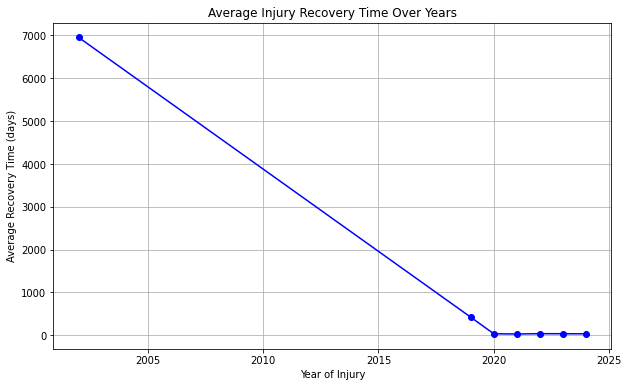

In [3]:
# Convert the relevant date columns to datetime format for analysis
#average injury over the years
data = injury_data_df
data['Injury / Surgery Date'] = pd.to_datetime(data['Injury / Surgery Date'], errors='coerce')
data['Return Date'] = pd.to_datetime(data['Return Date'], errors='coerce')

# Calculate the recovery duration in days
data['Recovery Time (days)'] = (data['Return Date'] - data['Injury / Surgery Date']).dt.days

# Filter out rows with missing or invalid recovery times
valid_recovery_data = data.dropna(subset=['Recovery Time (days)', 'Injury / Surgery Date', 'Return Date'])

# Create a time-series plot showing injury recovery patterns over time
import matplotlib.pyplot as plt

# Group by year of injury and calculate the average recovery time for each year
recovery_by_year = valid_recovery_data.groupby(valid_recovery_data['Injury / Surgery Date'].dt.year)['Recovery Time (days)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(recovery_by_year.index, recovery_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Injury Recovery Time Over Years')
plt.xlabel('Year of Injury')
plt.ylabel('Average Recovery Time (days)')
plt.grid(True)

plt.show()


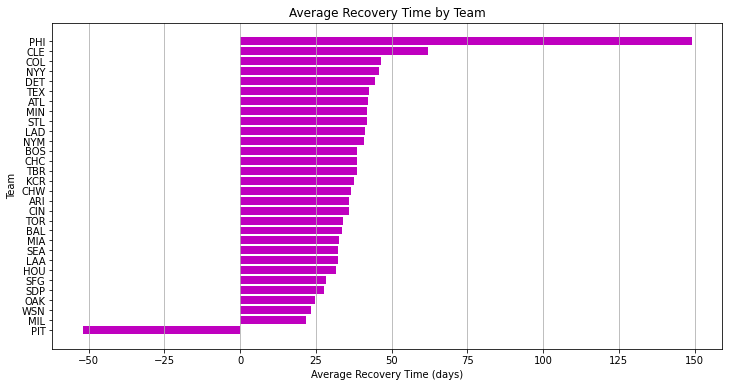

In [4]:
# Group the data by team and calculate the average recovery time for each team
recovery_by_team = valid_recovery_data.groupby('Team')['Recovery Time (days)'].mean().sort_values()

plt.figure(figsize=(12, 6))
plt.barh(recovery_by_team.index, recovery_by_team.values, color='m')
plt.title('Average Recovery Time by Team')
plt.xlabel('Average Recovery Time (days)')
plt.ylabel('Team')
plt.grid(axis='x')

plt.show()


<ipython-input-5-873e33f39996>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_recovery_data['Severity Level'] = valid_recovery_data['Recovery Time (days)'].apply(categorize_severity)


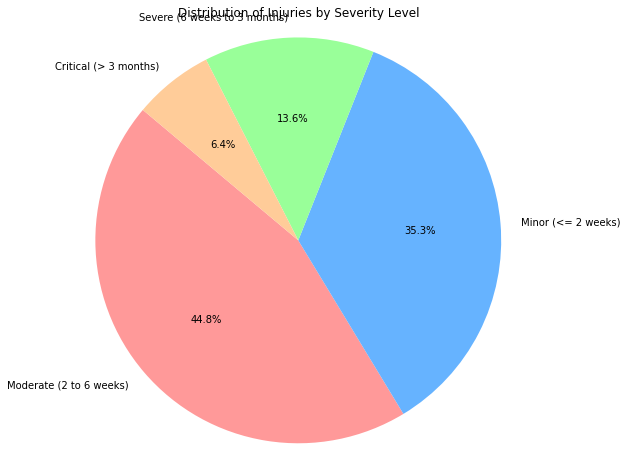

In [5]:
# Define recovery time severity categories
def categorize_severity(recovery_time):
    if recovery_time <= 14:
        return 'Minor (<= 2 weeks)'
    elif 15 <= recovery_time <= 42:
        return 'Moderate (2 to 6 weeks)'
    elif 43 <= recovery_time <= 90:
        return 'Severe (6 weeks to 3 months)'
    else:
        return 'Critical (> 3 months)'

# Apply the categorization function to the 'Recovery Time (days)' column
valid_recovery_data['Severity Level'] = valid_recovery_data['Recovery Time (days)'].apply(categorize_severity)

# Count the number of injuries in each severity level
severity_counts = valid_recovery_data['Severity Level'].value_counts()

# Create a pie chart to visualize the distribution of injury severity levels
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Injuries by Severity Level')
plt.axis('equal')

plt.show()


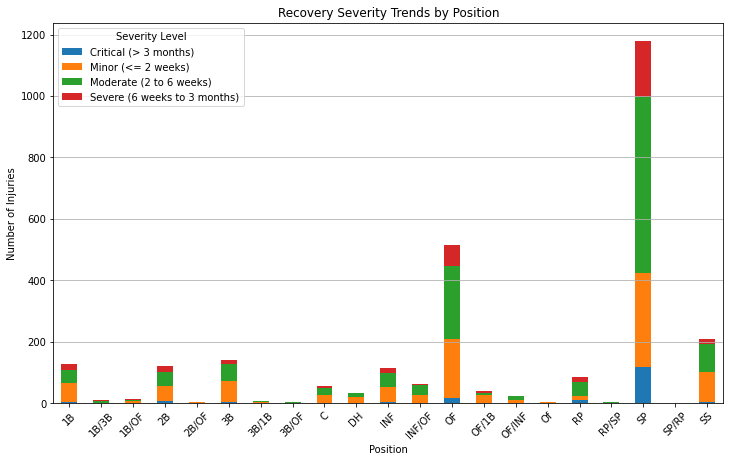

In [6]:
# Group by both position and severity level, and calculate the count of each severity level for each position
recovery_by_position_severity = valid_recovery_data.groupby(['Pos', 'Severity Level']).size().unstack(fill_value=0)

# Plot the distribution of recovery severity levels by position
recovery_by_position_severity.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Recovery Severity Trends by Position')
plt.xlabel('Position')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.grid(axis='y')

plt.show()


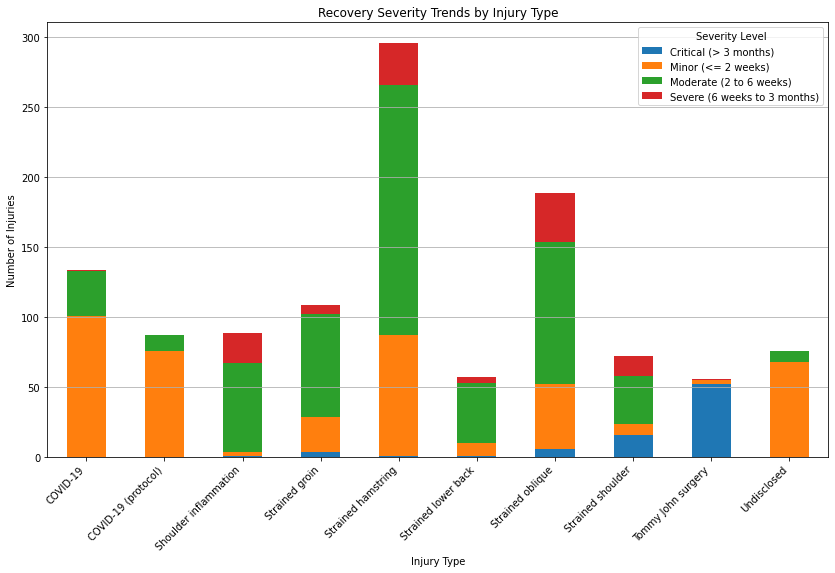

In [7]:
# Filter the dataset to keep only the most frequent injury types (to make visualization clearer)
top_injury_types = valid_recovery_data['Injury / Surgery'].value_counts().nlargest(10).index

# Filter the data to only include these top injury types
top_injury_data = valid_recovery_data[valid_recovery_data['Injury / Surgery'].isin(top_injury_types)]

# Group by both injury type and severity level, and calculate the count of each severity level for each injury type
recovery_by_injury_severity = top_injury_data.groupby(['Injury / Surgery', 'Severity Level']).size().unstack(fill_value=0)

# Plot the distribution of recovery severity levels by injury type
recovery_by_injury_severity.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Recovery Severity Trends by Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Severity Level')
plt.grid(axis='y')

plt.show()
